In [1]:
import numpy as np
from numpy.linalg import norm

import matplotlib.pyplot as plt

In [2]:
from skimage.transform.ssim_optimize import maximize_ssim, minimize_ssim
from skimage.metrics._structural_similarity import structural_similarity as ssim

In [30]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype("float64") / 255.
x_test = x_test.astype("float64") / 255.

In [4]:
def add_noise(img, eps):
    with_noise = np.copy(img)
    noise = np.random.randint(0, 255, size = with_noise.shape) / 255.
    noise = noise * eps / np.linalg.norm(noise)
    with_noise = np.clip(with_noise + noise, 0, 1)
    return with_noise

In [27]:
eps = 8

old_img = np.copy(x_test[0])

noise_img = add_noise(old_img, eps)
max_img = maximize_ssim(old_img, eps, 500, 10)
min_img = minimize_ssim(old_img, eps, 500, 10)

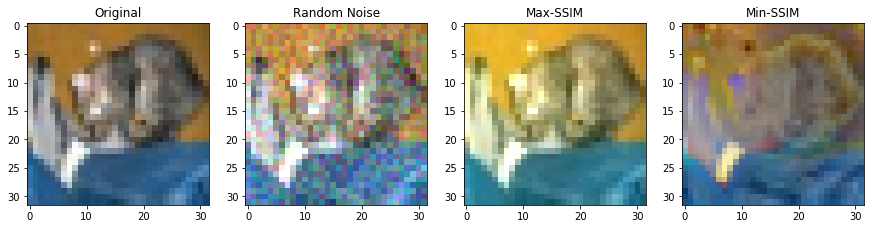

In [29]:
fig, axs = plt.subplots(1, 4, figsize=(15, 15))

axs[0].imshow(old_img)
axs[0].set_title("Original")

axs[1].imshow(noise_img)
axs[1].set_title("Random Noise")

axs[2].imshow(max_img)
axs[2].set_title("Max-SSIM")

axs[3].imshow(min_img)
axs[3].set_title("Min-SSIM")

plt.show()

In [28]:
print(" L-2 to Noisy:    ", norm(old_img - noise_img))
print(" L-2 to Max-SSIM: ", norm(old_img - max_img))
print(" L-2 to Min-SSIM: ", norm(old_img - min_img))

print("\nSSIM to Noisy:    ", ssim(old_img, noise_img, multichannel=True))
print("SSIM to Max-SSIM: ", ssim(old_img, max_img, multichannel=True))
print("SSIM to Min-SSIM: ", ssim(old_img, min_img, multichannel=True))

 L-2 to Noisy:     7.9314542868295534
 L-2 to Max-SSIM:  7.986463554146247
 L-2 to Min-SSIM:  7.99943185208284

SSIM to Noisy:     0.8026752816184014
SSIM to Max-SSIM:  0.9604163490092731
SSIM to Min-SSIM:  0.03664988129415773
